In [ ]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy
!pip install opencv-python

In [1]:
from matplotlib import pyplot as plt
import random
%matplotlib inline


plt.rcParams['figure.figsize'] = [18, 7] 

In [2]:
from PIL import Image
from numpy import asarray
import cv2
import math
import numpy as np
from sympy import *
# load the image



img_1=cv2.imread('img1.png',0) 
img_2=cv2.imread('img2.png',0) 
img_3=cv2.imread('img3.png',0) 



In [3]:
img_1.shape

(360, 640)

In [4]:
from sympy import *
def bilin(xs,ys,data):
        #This function takes fraction co-ordinate for source image based on target to source matrix and then uses bilinear interpolation to calculated the value of the given target co-ordinate
        xs_f=math.floor(xs)
        ys_f=math.floor(ys)
        a=ys-ys_f
        b=xs-xs_f
        #Above we calculate all necessary values to perform bilinear interpolation
        if (xs<0 or ys<0 or xs>data.shape[0]-2 or ys>data.shape[1]-2):
            #to account for the fact that this function may sometimes receive invalid co-ordinate such as negative or beyond image dimensions
            return False
        return (((1-a)*(1-b)*data[xs_f][ys_f])+
                ((a)*(1-b)*data[xs_f+1][ys_f])+
                ((1-a)*(b)*data[xs_f][ys_f+1])+
                ((a)*(b)*data[xs_f+1][ys_f+1]))
    

def homography(p1):
    a=np.empty((0,9))
    for i in range(len(p1)):
        x=p1[i][0]
        y=p1[i][1]
        a = np.append(a, np.array([[y[0],y[1],1,0,0,0,-1*(x[0]*y[0]),-1*(x[0]*y[1]),-x[0]]]), axis=0)
        a = np.append(a, np.array([[0,0,0,y[0],y[1],1,-1*(x[1]*y[0]),-1*(x[1]*y[1]),-x[1]]]), axis=0)
    #Creating numpy array to store A after this we will use sympy to solve for null space of this matrix
    A=Matrix(a)
    temp=A.nullspace()
    #temp is null matrix for A
    a=temp[0][0]
    b=temp[0][1]
    c=temp[0][2]
    d=temp[0][3]
    e=temp[0][4]
    f=temp[0][5]
    g=temp[0][6]
    h=temp[0][7]
    i=temp[0][8]
    # this assignment is based on the above equations

    h = np.array([[a,b,c], 
                  [d,e,f],
                  [g,h,i]])
    return Matrix(h)


def ransac(point_cor,dist,support_check,num_iter=20,debug=False):#[from][to]
    flag=True
    it=0
    if support_check>1:
        print("enter support<1")
        return False
    support=0
    while(flag):
        consensus=set()
        #Creating the A matrix which we will solve to find Homography for the given point correspondence
        a=np.empty((0,9))
        H=homography(random.sample(point_cor,4))
        H=np.float_(H)
        for i in point_cor:
            temp_x=np.matmul(H,np.array([i[1][0],i[1][1],1]))
            if temp_x[2]>1:
                temp_x[0]=temp_x[0]/temp_x[2]
                temp_x[1]=temp_x[1]/temp_x[2]
            d=np.sqrt(((i[0][0]-temp_x[0])**2)+((i[0][1]-temp_x[1])**2))
            if (d<dist):
                consensus.add(point_cor.index(i))
        if ((len(consensus)/len(point_cor))>support):
            support=len(consensus)/len(point_cor)
            if (support>support_check):
                return H,support
        it+=1
        if debug==True:
            print("Iteration :",it,"Consensus :",support)
        if it>num_iter:
            flag=False
            return H,support


In [5]:
data = asarray(img_1)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


In [6]:
data = asarray(img_2)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


In [7]:
data = asarray(img_3)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(360, 640)
Number of Pixels 230400


Text(0.5, 1.0, 'IMG3')

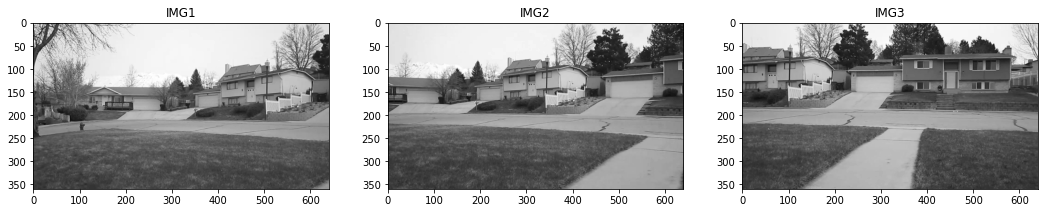

In [8]:
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img_3,cmap="gray")
axis[2].set_title('IMG3')

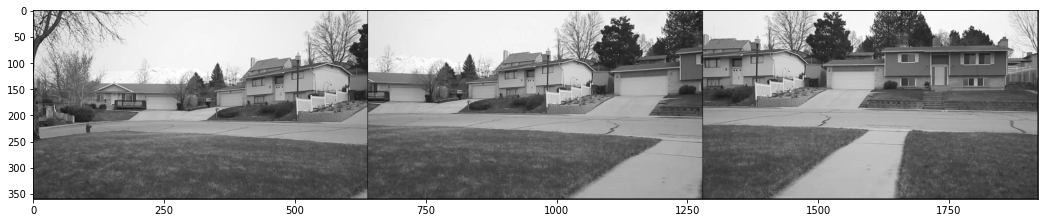

In [9]:

data4=np.zeros((360, 1920))
data1 = asarray(img_1)
data2 = asarray(img_2)
data3 = asarray(img_3)
for x in range(data1.shape[0]-1):
    for y in range(data1.shape[1]-1):
        data4[x][y]=data1[x][y]
for x in range(data2.shape[0]-1):
    for y in range(data2.shape[1]-1):
        data4[x][y+640]=data2[x][y]
for x in range(data3.shape[0]-1):
    for y in range(data3.shape[1]-1):
        data4[x][y+1280]=data3[x][y]
plt.imshow(data4,cmap="gray")

Text(0.5, 1.0, 'IMG3')

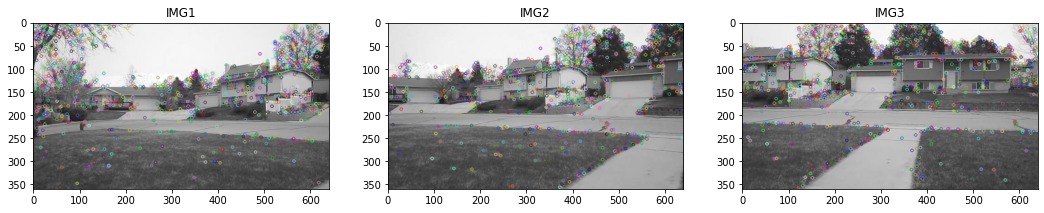

In [10]:

img_1=cv2.imread('img1.png',0) 
img_2=cv2.imread('img2.png',0) 
img_3=cv2.imread('img3.png',0) 

#keypoints

sift_1 = cv2.SIFT_create()
kp_1,des_1 = sift_1.detectAndCompute(img_1,None)




#keypoints
sift_2 = cv2.SIFT_create()
kp_2,des_2 = sift_2.detectAndCompute(img_2,None)




#keypoints
sift_3 = cv2.SIFT_create()
kp_3,des_3 = sift_3.detectAndCompute(img_3,None)


img1=np.zeros((360,640))
img1 = cv2.drawKeypoints(img_1,kp_1,img1)

img2=np.zeros((360,640))
img2 = cv2.drawKeypoints(img_2,kp_2,img2)

img3=np.zeros((360,640))
img3 = cv2.drawKeypoints(img_3,kp_3,img3)

figure, axis = plt.subplots(1, 3)
axis[0].imshow(img1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img3,cmap="gray")
axis[2].set_title('IMG3')

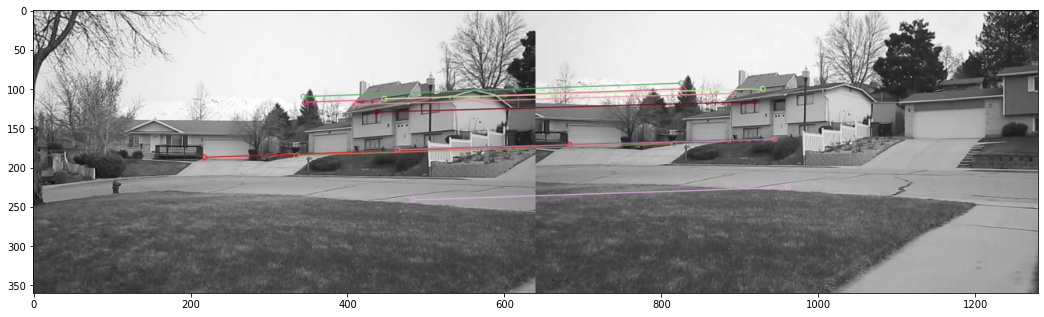

In [34]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# match descriptors of both images
matches = bf.match(des_1,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 4 matches
matched_img = cv2.drawMatches(img_1, kp_1, img_2, kp_2, matches[:10], img_2, flags=2)
plt.imshow(matched_img)

In [35]:
list_kp21 = [(kp_1[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:50]] 
H21=homography(random.sample(list_kp21,4))

In [36]:
H21

Matrix([
[    0.837984924400123,    0.227845463680679, 153.376872180853],
[  -0.0771204552882356,      1.0125531336163, 26.2615141661071],
[-0.000351039653549794, 0.000369132650652676,                1]])

In [37]:
H21,support=ransac(list_kp21,5,0.8,1000,debug=True)

Iteration : 1 Consensus : 0.2
Iteration : 2 Consensus : 0.2
Iteration : 3 Consensus : 0.2
Iteration : 4 Consensus : 0.2
Iteration : 5 Consensus : 0.2
Iteration : 6 Consensus : 0.2
Iteration : 7 Consensus : 0.44
Iteration : 8 Consensus : 0.44
Iteration : 9 Consensus : 0.44
Iteration : 10 Consensus : 0.44
Iteration : 11 Consensus : 0.44
Iteration : 12 Consensus : 0.44
Iteration : 13 Consensus : 0.44
Iteration : 14 Consensus : 0.44
Iteration : 15 Consensus : 0.44
Iteration : 16 Consensus : 0.44
Iteration : 17 Consensus : 0.44
Iteration : 18 Consensus : 0.44
Iteration : 19 Consensus : 0.44
Iteration : 20 Consensus : 0.56
Iteration : 21 Consensus : 0.56
Iteration : 22 Consensus : 0.56
Iteration : 23 Consensus : 0.56
Iteration : 24 Consensus : 0.56
Iteration : 25 Consensus : 0.56
Iteration : 26 Consensus : 0.56
Iteration : 27 Consensus : 0.56
Iteration : 28 Consensus : 0.56
Iteration : 29 Consensus : 0.56
Iteration : 30 Consensus : 0.56
Iteration : 31 Consensus : 0.56
Iteration : 32 Consensu

In [33]:
len(list_kp21)

50

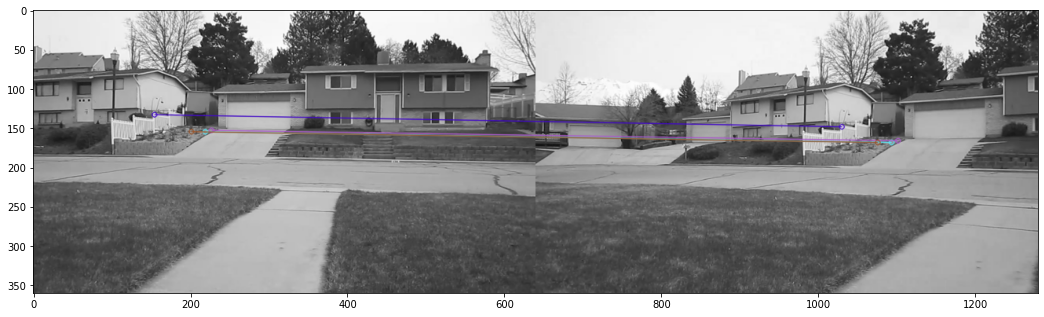

In [16]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(des_3,des_2)
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img_3, kp_3, img_2, kp_2, matches[:4], img_2, flags=2)
plt.imshow(matched_img)

In [17]:
list_kp23 = [(kp_3[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:50]] 
H23=homography(random.sample(list_kp23,4))

In [18]:
H23

Matrix([
[  -0.537512309987489,   -0.285224325393135, 258.449021133956],
[  -0.272811576771024,   -0.259013930476321, 145.273469534114],
[-0.00205587087638809, -0.00130546474693465,                1]])

In [19]:
H23,support=ransac(list_kp23,5,0.8,1000,debug=True)

Iteration : 1 Consensus : 0.72


In [20]:
H23

array([[ 1.57175164e+00, -2.11228686e-02, -3.98111614e+02],
       [ 1.71780855e-01,  1.42990737e+00, -9.70870170e+01],
       [ 9.25184980e-04,  5.48165780e-05,  1.00000000e+00]])

In [21]:
support

0.96

In [22]:
len(list_kp23)

50

In [23]:

from PIL import Image
from numpy import asarray

# load the image
img_1 = asarray(Image.open('img1.png'))
img_2 = asarray(Image.open('img2.png'))
img_3 = asarray(Image.open('img3.png'))

H21_i=np.linalg.inv(H21)
H23_i=np.linalg.inv(H23)

Text(0.5, 1.0, 'IMG3')

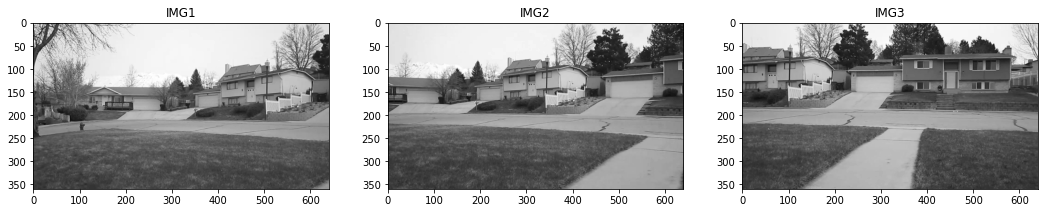

In [24]:
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(img_3,cmap="gray")
axis[2].set_title('IMG3')

In [ ]:
canvas=np.zeros((1080,1920))
offset=[300,300]

for y_s in range(canvas.shape[0]):
    for x_s in range(canvas.shape[1]):
        x=x_s-offset[1]
        y=y_s-offset[0]
        v=[]
        
        x21=np.matmul(H21,np.array([x,y,1]))
        x21[0]=x21[0]/x21[2]
        x21[1]=x21[1]/x21[2]
        v.append(bilin(x21[0],x21[1],img_1))
        
        x23=np.matmul(H23,[x,y,1])
        x23[0]=x23[0]/x23[2]
        x23[1]=x23[1]/x23[2]
        v.append(bilin(x23[0],x23[1],img_3))
        
        
        v.append(bilin(x,y,img_2))

        
        if v.count(False)>2:
            continue
        canvas[x_s][y_s]=sum(v)/(3-v.count(False))
        
                      

In [ ]:
plt.imshow(canvas,cmap="gray")

In [26]:
list_kp23 = [(kp_3[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:10]] 
H23=homography(random.sample(list_kp23,4))
list_kp21 = [(kp_1[mat.queryIdx].pt,kp_2[mat.trainIdx].pt) for mat in matches[:10]] 
H21=homography(random.sample(list_kp21,4))

In [28]:
H21,support=ransac(list_kp21,5,0.8,1000)
print(support)
H23,support=ransac(list_kp23,5,0.8,1000)
print(support)

0.4
1.0


In [ ]:
canvas=np.zeros((1080,1920))
offset=[300,300]

plt.imshow(canvas,cmap="gray")
for y_s in range(canvas.shape[0]):
    for x_s in range(canvas.shape[1]):
        
        x=x_s-offset[0]
        y=y_s-offset[1]
        tmp=np.matmul(H21,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]

        plt.scatter(tmp[0],tmp[1],color='g')

        plt.scatter(x,y,color='r')

        tmp=np.matmul(H23,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]

        print(tmp[0],tmp[1])
        plt.scatter(tmp[0],tmp[1],color='b')
        
                      

In [ ]:
plt.imshow(canvas,cmap="gray")

In [ ]:
x=-225
y=0
tmp=np.matmul(H21,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]
print(tmp[0],tmp[1],"img1")
figure, axis = plt.subplots(1, 3)
axis[0].imshow(img_1,cmap="gray")
axis[0].scatter(tmp[0],tmp[1],color='r')
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].scatter(x,y,color='r')
axis[1].set_title('IMG2')
tmp=np.matmul(H23,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]
axis[2].imshow(img_3,cmap="gray")
axis[2].scatter(tmp[0],tmp[1],color='r')
axis[2].set_title('IMG3')

In [ ]:
canvas=np.zeros((1000,1000))
offset=[300,300]
x_s=0
y_s=0
x=x_s-offset[0]
y=y_s-offset[1]

tmp=np.matmul(H21,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]
print(tmp[0],tmp[1])


plt.imshow(canvas,cmap="gray")
plt.scatter(tmp[0],tmp[1],color='g')
plt.scatter(x,y,color='r')

tmp=np.matmul(H23,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]

print(tmp[0],tmp[1])
plt.scatter(tmp[0],tmp[1],color='b')
plt.scatter(x_s,y_s,color='red')

In [ ]:
print(x)

In [58]:

x=640
y=360

[659.65457534 275.23912282   1.9980876 ]


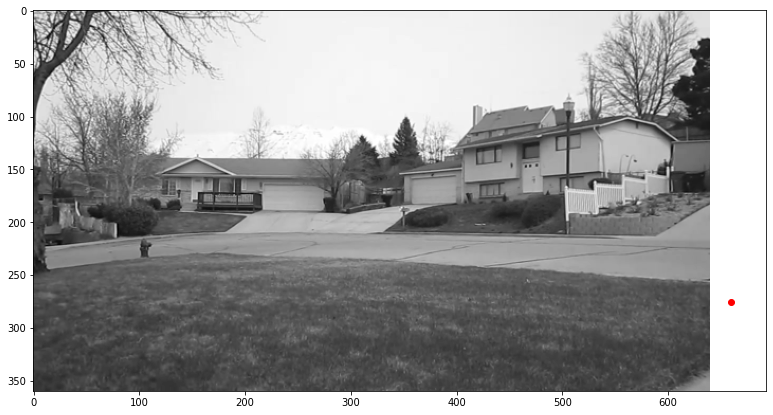

In [59]:
plt.imshow(img_1,cmap="gray")
tmp=np.matmul(H21,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]
plt.scatter(tmp[0],tmp[1],color='r')
print(tmp)

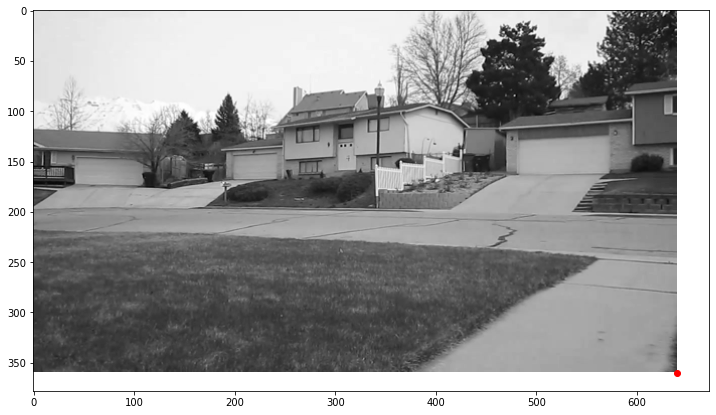

In [61]:
plt.imshow(img_2,cmap="gray")
plt.scatter(x,y,color='r')
plt.show()

[377.42163075 328.28442163   1.57359234]


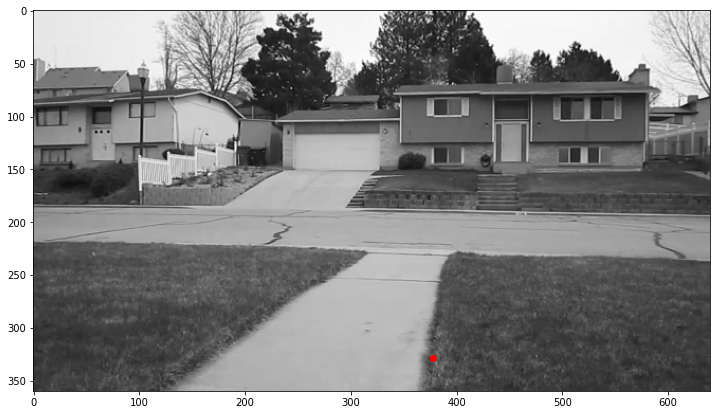

In [62]:
plt.imshow(img_3,cmap="gray")
tmp=np.matmul(H23,[x,y,1])
tmp[0]=tmp[0]/tmp[2]
tmp[1]=tmp[1]/tmp[2]
plt.scatter(tmp[0],tmp[1],color='r')
print(tmp)

In [63]:
800+377.42163075

1177.42163075

In [65]:
canvas=np.zeros((600,1200))
offset=[75,10]
plt.imshow(canvas,cmap="gray")
for y_s in range(canvas.shape[0]):
    for x_s in range(canvas.shape[1]):
        
        x=x_s-offset[0]
        y=y_s-offset[1]
        tmp=np.matmul(H21,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]

        plt.scatter(tmp[0],tmp[1],color='g')

        plt.scatter(x,y,color='r')

        tmp=np.matmul(H23,[x,y,1])
        tmp[0]=tmp[0]/tmp[2]
        tmp[1]=tmp[1]/tmp[2]

        plt.scatter(tmp[0],tmp[1],color='b')
        
                      

KeyboardInterrupt: 

In [ ]:
plt.imshow(canvas,cmap="gray")